In [117]:
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [118]:
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy',] 
           
Labelss =   ['Apple Healthy', 'Apple Rotten', 'Banana Healthy',]   

In [119]:
"""columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', 
           'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten',
           'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten',
           'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy','Pomegranate__Rotten',
           'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten'] 
           
Labelss =   ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten', 'Bellpepper Healthy', 
           'Bellpepper Rotten', 'Carrot Healthy', 'Carrot Rotten', 'Cucumber Healthy', 'Cucumber Rotten',
           'Grape Healthy', 'Grape Rotten', 'Guava Healthy', 'Guava Rotten', 'Jujube Healthy', 'Jujube Rotten',
           'Mango Healthy', 'Mango Rotten', 'Orange Healthy', 'Orange Rotten', 'Pomegranate Healthy','Pomegranate Rotten',
           'Potato Healthy', 'Potato Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']   """

"columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', \n           'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten',\n           'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten',\n           'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy','Pomegranate__Rotten',\n           'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten'] \n           \nLabelss =   ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten', 'Bellpepper Healthy', \n           'Bellpepper Rotten', 'Carrot Healthy', 'Carrot Rotten', 'Cucumber Healthy', 'Cucumber Rotten',\n           'Grape Healthy', 'Grape Rotten', 'Guava Healthy', 'Guava Rotten', 'Jujube Healthy', 'Jujube Rotten',\n           'Mango Healthy', 'Mango Rotten', 'Orange Healthy'

In [120]:
images = []
labels = []
img_size = 100

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir('../archive/Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread('../archive/Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size)) # Changing the img size
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Transforming the img in gray scale
        image_gray = image_gray.reshape(img_size, img_size, 1) # Changing shape to 100, 100, 1
        images.append(image_gray)
        labels.append(count)
    count += 1

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten
Loading -->  Banana__Healthy


In [121]:
print(len(images))
print(len(labels))


unique_labels = list(set(labels))
print(unique_labels)

7368
7368
[0, 1, 2]


In [122]:
images[0]

array([[[229],
        [235],
        [234],
        ...,
        [225],
        [221],
        [218]],

       [[231],
        [230],
        [235],
        ...,
        [223],
        [225],
        [218]],

       [[228],
        [232],
        [234],
        ...,
        [227],
        [219],
        [217]],

       ...,

       [[239],
        [239],
        [237],
        ...,
        [202],
        [201],
        [197]],

       [[238],
        [236],
        [236],
        ...,
        [200],
        [200],
        [192]],

       [[237],
        [232],
        [235],
        ...,
        [204],
        [201],
        [200]]], dtype=uint8)

In [123]:
training_data = []
for img, label in zip(images, labels):
    training_data.append([img, label])

In [124]:
training_data[3000]

[array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 1]

In [125]:
X = []
y = []

for img , lab in training_data:
    X.append(img)
    y.append(lab)

In [126]:
X = np.array(X).astype(float)/255
X

array([[[[0.89803922],
         [0.92156863],
         [0.91764706],
         ...,
         [0.88235294],
         [0.86666667],
         [0.85490196]],

        [[0.90588235],
         [0.90196078],
         [0.92156863],
         ...,
         [0.8745098 ],
         [0.88235294],
         [0.85490196]],

        [[0.89411765],
         [0.90980392],
         [0.91764706],
         ...,
         [0.89019608],
         [0.85882353],
         [0.85098039]],

        ...,

        [[0.9372549 ],
         [0.9372549 ],
         [0.92941176],
         ...,
         [0.79215686],
         [0.78823529],
         [0.77254902]],

        [[0.93333333],
         [0.9254902 ],
         [0.9254902 ],
         ...,
         [0.78431373],
         [0.78431373],
         [0.75294118]],

        [[0.92941176],
         [0.90980392],
         [0.92156863],
         ...,
         [0.8       ],
         [0.78823529],
         [0.78431373]]],


       [[[0.23921569],
         [0.23529412],
         [0.23

In [127]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [128]:
y = np.array(y)

In [129]:
X.shape

(7368, 100, 100, 1)

(Number of img, size, size, 1D gray scale)

Model Training, Architecture and hyperparameter

In [136]:
model_dense = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape =(100,100,1)),
    tf.keras.layers.Dense(150, activation='relu'),#dense layer 150 neurons
    tf.keras.layers.Dense(150, activation='relu'), #dense layer 150 neurons
    tf.keras.layers.Dense(3, activation='softmax'), #Ouput layer one output neuron softmax
])



In [137]:
model_CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape =(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5), # dropout before the dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),                                      
])

In [138]:
model_dense.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])


In [139]:
model_CNN.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [140]:
from tensorflow.keras.callbacks import TensorBoard

In [141]:
TensorBoardDenso = TensorBoard(log_dir='logs/denso')
model_dense.fit(X,y, batch_size= 32, 
                validation_split=0.15, 
                epochs=100)

Epoch 1/100
196/196 [==============================] - 6s 24ms/step - loss: 0.9682 - accuracy: 0.5602 - val_loss: 1.1461 - val_accuracy: 0.5796
Epoch 2/100
196/196 [==============================] - 5s 24ms/step - loss: 0.7427 - accuracy: 0.6364 - val_loss: 0.6394 - val_accuracy: 0.7215
Epoch 3/100
196/196 [==============================] - 5s 26ms/step - loss: 0.6821 - accuracy: 0.6616 - val_loss: 2.3432 - val_accuracy: 0.0606
Epoch 4/100
196/196 [==============================] - 5s 24ms/step - loss: 0.6678 - accuracy: 0.6765 - val_loss: 1.7548 - val_accuracy: 0.3535
Epoch 5/100
196/196 [==============================] - 5s 24ms/step - loss: 0.6476 - accuracy: 0.6905 - val_loss: 0.1891 - val_accuracy: 0.9539
Epoch 6/100
196/196 [==============================] - 5s 23ms/step - loss: 0.6324 - accuracy: 0.6966 - val_loss: 2.5225 - val_accuracy: 0.3626
Epoch 7/100
196/196 [==============================] - 5s 24ms/step - loss: 0.6201 - accuracy: 0.6990 - val_loss: 1.8562 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
TensorBoardCNN = TensorBoard(log_dir='logs/CNN') 
model_CNN.fit(X,y, batch_size= 32, validation_split=0.15, epochs=100, callbacks=[TensorBoardCNN])

In [ ]:
%load_ext tensor

In [ ]:
%tensorboard --logdir log

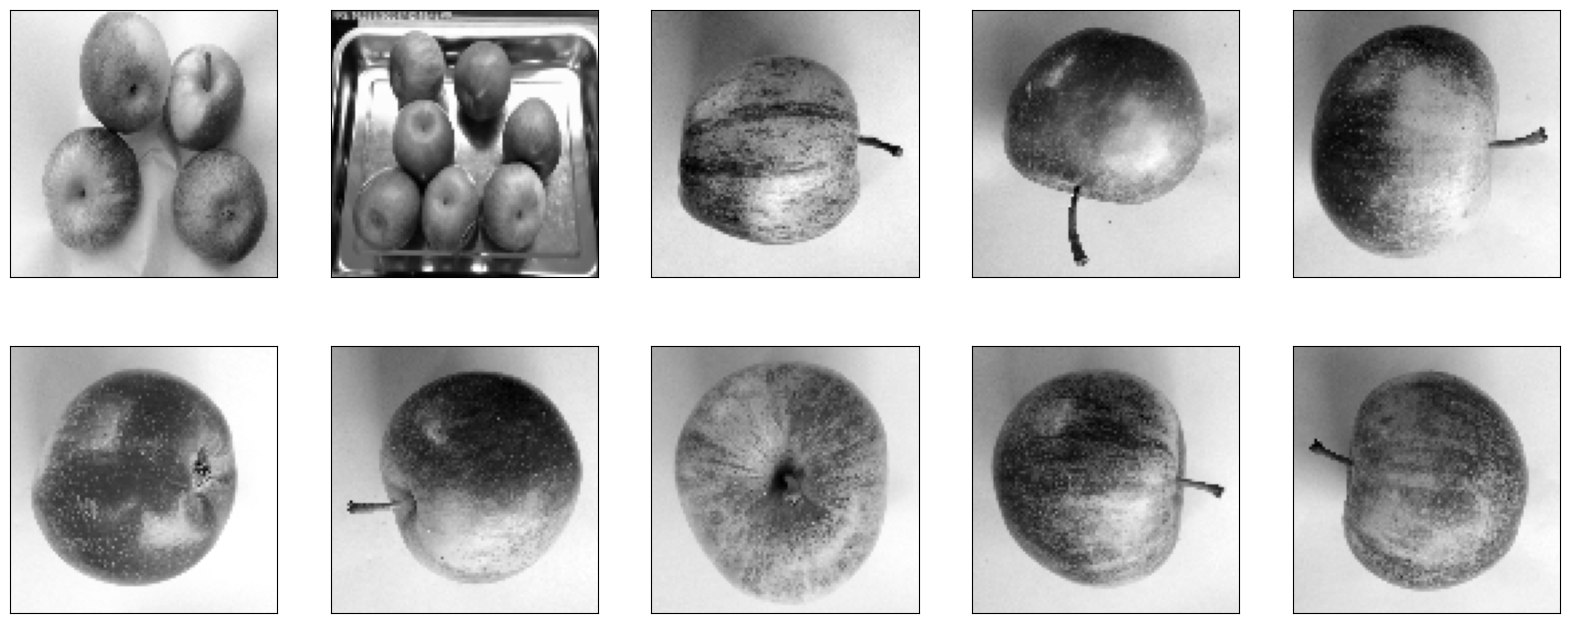

In [ ]:
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

featuring engineer

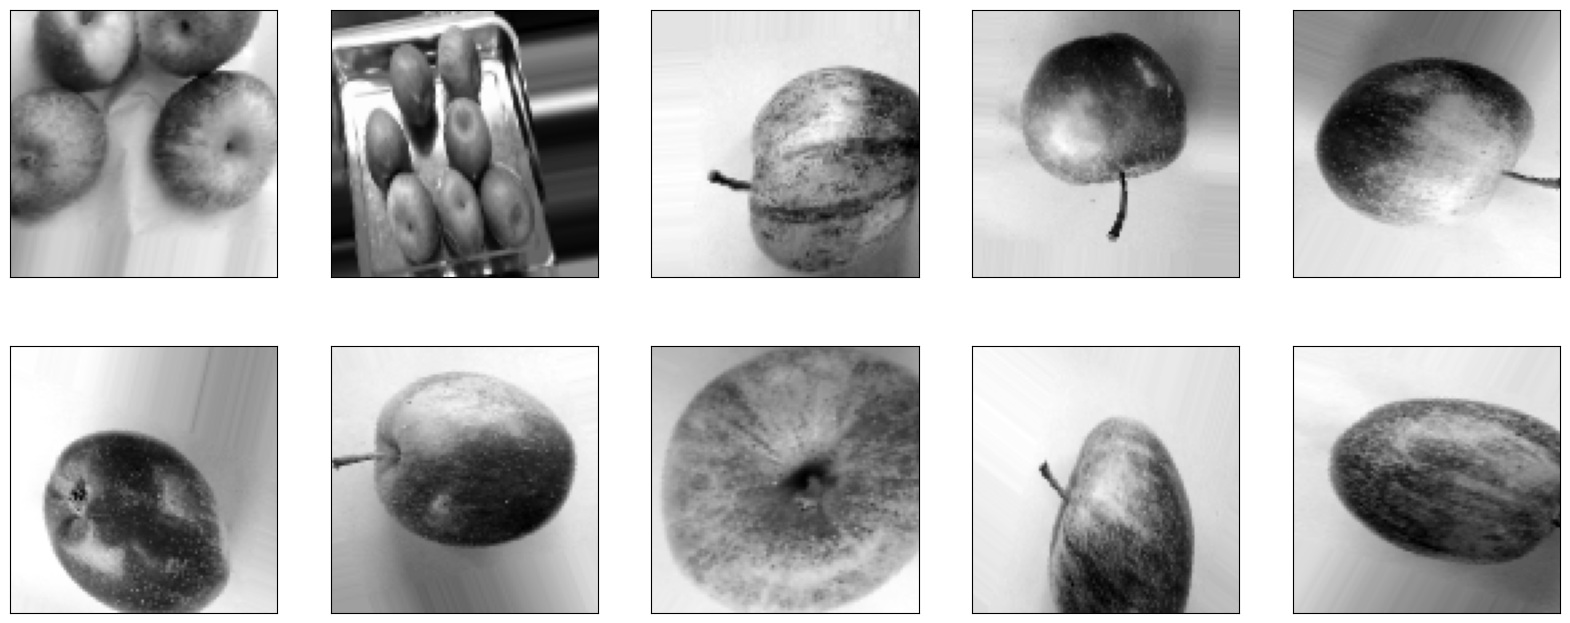

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)


datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [150]:
modelCNN_DA = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [148]:
modelCNN_DA.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
a = len(X) * .85
b = len(X) - a 

X_train = X[:4562]
X_test = X[4562:]

y_train = y[:4562]
y_test = y[4562:]

In [ ]:
data_gen_trainning =datagen.flow(X_train,y_train, batch_size=32)

In [152]:
TensorBoardCNN_DA = TensorBoard(log_dir='logs/CNN') 
modelCNN_DA.fit(X,y, batch_size= 32,epochs=100, 
              validation_data = (X_test, y_test), 
              step_per_epoch =int(np.ceil(len(X_test)/float(32))),
              validation_steps =int(np.ceil(len(X_test)/float(32))),
              callbacks=[TensorBoardCNN_DA])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HOME\AppData\Local\Temp\ipykernel_20424\827184214.py", line 2, in <module>
    modelCNN_DA.fit(X,y, batch_size= 32,epochs=100,
  File "c:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'step_per_epoch'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  